***
##### This module builds a Support Vector Regression (SVR) model, whose kernel function is radial basis fucntion. The main task is to train a SVR model to do stock price forecasting, and the forecasting is about the 30-day stock price prediction. 

##### This module splits the original data set into training set and test set. After training the SVR model with the training set, the module computes the root mean square error (RMSE) and the coefficient of determination (R<sup>2</sup>) in the test set. Plus, the module computes the accuracy of trend prediction in the test set. In order to improve the data visualization, this module also plots the actual stock price and the predicted stock price on the same figure.

##### To make comparison, this module also trains a Linear Regression model to do the same type of forecasting.
 
##### Authored by Menghong Huang and Zhaosheng Li.
***

## Importing python packages

In [1]:
%matplotlib inline
import numpy as np                                  # advanced math library
from sklearn.svm import SVR                         # Support Vector Regression model
from sklearn.linear_model import LinearRegression   # Linear regression model
import matplotlib.pyplot as plt                     # MATLAB like plotting routines
import pandas as pd                                 # For loading the data into dataframe
import joblib                                       # For saving and loading model

# For calculating RMSE, the usage refers to https://stackoverflow.com/a/18623635 
from sklearn.metrics import mean_squared_error
from math import sqrt

# For calculating the coefficient of determination (R^2), 
# The usage refers to https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
from sklearn.metrics import r2_score

# For splitting data set into training and test sets
from sklearn.model_selection import train_test_split

## Loading data into dataframe by using `panda` module

In [2]:
df = pd.read_csv("data/GME_stock.csv")

### Reset the index of dataframe as 'date' for later plotting

In [3]:
df.reset_index(inplace = True)
df.set_index("date", inplace = True)

### Take a look at the first and last five entries of the dataframe

In [4]:
df.head()

,index,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,,
2002-02-13,0,9.625,10.060,9.525,10.050,19054000,6.766666
2002-02-14,1,10.175,10.195,9.925,10.000,2755400,6.733003
2002-02-15,2,10.000,10.025,9.850,9.950,2097400,6.699336
2002-02-19,3,9.900,9.900,9.375,9.550,1852600,6.430017
2002-02-20,4,9.600,9.875,9.525,9.875,1723200,6.648838


In [5]:
df.tail()

,index,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,,
2021-01-22,4768,42.590000,76.760002,42.320000,65.010002,196784300,65.010002
2021-01-25,4769,96.730003,159.179993,61.130001,76.790001,177874000,76.790001
2021-01-26,4770,88.559998,150.000000,80.199997,147.979996,178588000,147.979996
2021-01-27,4771,354.829987,380.000000,249.000000,347.510010,93396700,347.510010
2021-01-28,4772,265.000000,483.000000,112.250000,193.600006,58815800,193.600006


### Extracting `close_price` from the dataframe

In [6]:
df = df[['close_price']]

## Initializing the time step variable

In [7]:
forecasting_time_step = 30

## Creating a new column named `target_close_price`

In [8]:
df['target_close_price'] = df['close_price'].shift(-forecasting_time_step)

#### Taking a look at the first and last five entries of the new dataframe

In [9]:
df.head()

,close_price,target_close_price
date,,
2002-02-13,10.050,10.100
2002-02-14,10.000,9.525
2002-02-15,9.950,9.320
2002-02-19,9.550,9.300
2002-02-20,9.875,9.475


In [10]:
df.tail()

,close_price,target_close_price
date,,
2021-01-22,65.010002,NaN
2021-01-25,76.790001,NaN
2021-01-26,147.979996,NaN
2021-01-27,347.510010,NaN
2021-01-28,193.600006,NaN


## Removing all the `NaN` entries from the new dataframe

In [11]:
df = df[:-forecasting_time_step]

In [12]:
df.tail()

,close_price,target_close_price
date,,
2020-12-08,16.940001,65.010002
2020-12-09,13.660000,76.790001
2020-12-10,14.120000,147.979996
2020-12-11,13.310000,347.510010
2020-12-14,12.720000,193.600006


## Putting feature and label into two lists

In [13]:
X = np.array(df['close_price']).reshape(-1, 1)
Y = np.array(df['target_close_price'])

## Splitting the dataset into training and test sets

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = False)

In [15]:
dates_training = pd.to_datetime(df.index[:len(x_train)])
dates_test = pd.to_datetime(df.index[len(x_train):])

## Loading the SVR and LR models

In [16]:
SVR_RBF = joblib.load("SVR_Model/SVR_30_model.pkl")

In [17]:
LR = joblib.load("LR_Model/LR_30_model.pkl")

## Building the SVR and LR models

##### If you have already loaded the two models in the `Loading the trained SVR and LR models` section, please feel free to skip this step

In [16]:
SVR_RBF = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)

In [17]:
LR = LinearRegression()

## Training the SVR and LR models

##### If you have already loaded the two models in the `Loading the trained SVR and LR models` section, please feel free to skip this step

In [18]:
SVR_RBF.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [19]:
LR.fit(x_train, y_train)

LinearRegression()

## Saving the trained SVR and LR models

##### If you have already loaded the two models in the `Loading the trained SVR and LR models` section, please feel free to skip this step

In [20]:
joblib.dump(SVR_RBF, "SVR_Model/SVR_30_model.pkl")

['SVR_Model/SVR_30_model.pkl']

In [21]:
joblib.dump(LR, "LR_Model/LR_30_model.pkl")

['LR_Model/LR_30_model.pkl']

## Plotting the actual price and predicted price in the training set

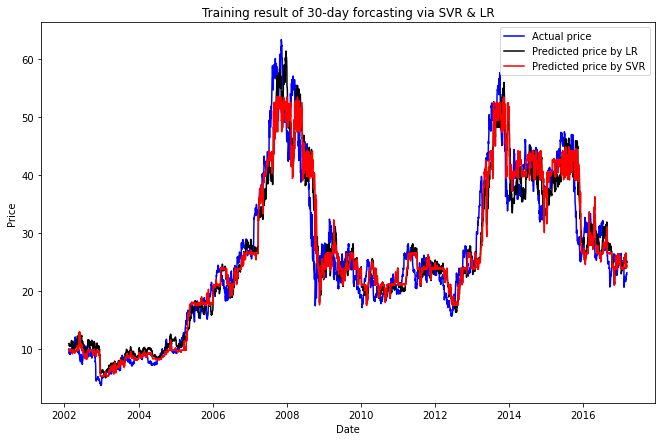

In [18]:
plt.figure(figsize = (11, 7))
plt.plot(dates_training, y_train, color= 'blue', label= 'Actual price')
plt.plot(dates_training, LR.predict(x_train), color= 'black', label= 'Predicted price by LR') 
plt.plot(dates_training, SVR_RBF.predict(x_train), color= 'red', label= 'Predicted price by SVR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Training result of 30-day forcasting via SVR & LR')
plt.legend()
plt.savefig('img/SVR_30_training_result.png')
plt.show()

## Plotting the actual price and predicted price in the test set

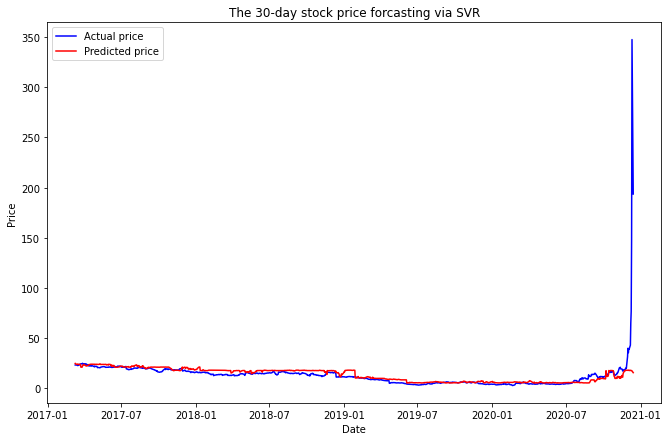

In [19]:
plt.figure(figsize = (11, 7))
plt.plot(dates_test, y_test, color= 'blue', label= 'Actual price')
plt.plot(dates_test, SVR_RBF.predict(x_test), color= 'red', label= 'Predicted price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('The 30-day stock price forcasting via SVR')
plt.legend()
plt.savefig('img/SVR_30_test_result.png')
plt.show()

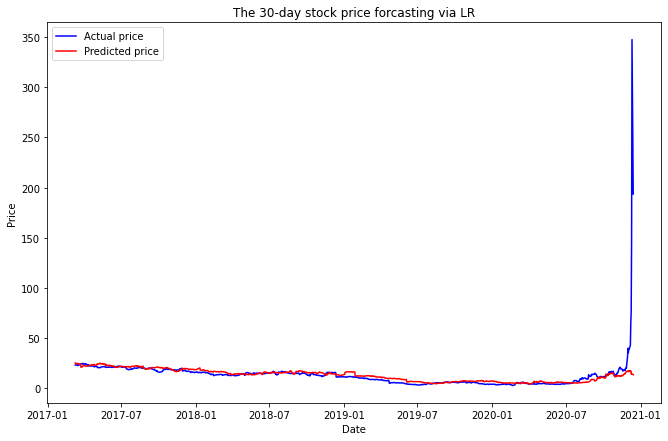

In [20]:
plt.figure(figsize = (11, 7))
plt.plot(dates_test, y_test, color= 'blue', label= 'Actual price')
plt.plot(dates_test, LR.predict(x_test), color= 'red', label= 'Predicted price') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('The 30-day stock price forcasting via LR')
plt.legend()
plt.savefig('img/LR_30_test_result.png')
plt.show()

### Showing the slope \& intercept of the trained LR model

In [18]:
print(f'LR model slope: {LR.coef_}')
print(f'LR model intercept: {LR.intercept_}')

LR model slope: [0.94475282]
LR model intercept: 1.5269864060999403


### Computing the root mean square error (RMSE)

In [26]:
print(f'The root mean square error (RMSE) for SVR model is {sqrt(mean_squared_error(y_test, SVR_RBF.predict(x_test)))}')

The root mean square error (RMSE) for SVR model is 13.515519221492598


In [27]:
print(f'The root mean square error (RMSE) for LR model is {sqrt(mean_squared_error(y_test, LR.predict(x_test)))}')

The root mean square error (RMSE) for LR model is 13.596442002219465


### Computing the coefficient of determination (R<sup>2</sup>)

In [28]:
print(f'The coefficient of determination (R^2) for the SVR model is {SVR_RBF.score(x_test, y_test)}')

The coefficient of determination (R^2) for the SVR model is 0.171020106266216


In [29]:
print(f'The coefficient of determination (R^2) for the LR model is {LR.score(x_test, y_test)}')

The coefficient of determination (R^2) for the LR model is 0.1610635245889077


### Building a function to compute the trend prediction accuracy

In [30]:
def accForTrendPredict(test_actual_value, test_predicted_value):
    y_var_test = test_actual_value[1:] - test_actual_value[:len(test_actual_value)-1]
    y_var_predict = test_predicted_value[1:] - test_predicted_value[:len(test_predicted_value)-1]

    return (np.sum(np.sign(y_var_test) == np.sign(y_var_predict)) / len(y_var_test)) * 100

### Computing the accuracy of trend prediction

In [31]:
acc_SVR = accForTrendPredict(y_test.reshape(-1, 1), SVR_RBF.predict(x_test).reshape(-1, 1))
print(f'The accuracy of trend prediction for SVR model is {acc_SVR}%')

The accuracy of trend prediction for SVR model is 48.31223628691983%


In [32]:
acc_LR = accForTrendPredict(y_test.reshape(-1, 1), LR.predict(x_test).reshape(-1, 1))
print(f'The accuracy of trend prediction for LR model is {acc_LR}%')

The accuracy of trend prediction for LR model is 51.26582278481012%


## Removing the last 11 days

### Making the plot

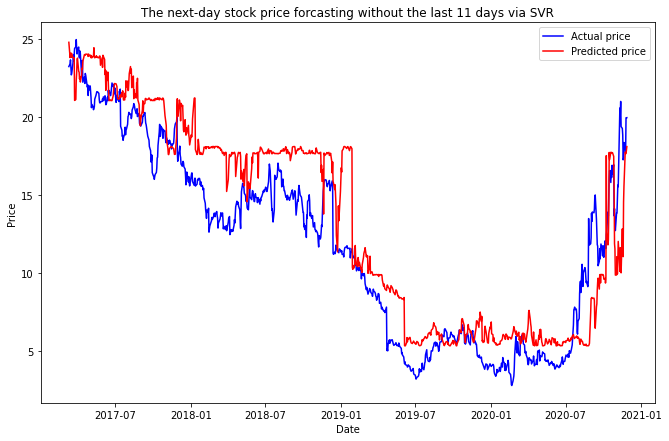

In [21]:
plt.figure(figsize = (11, 7))
plt.plot(dates_test[:-11], y_test[:-11], color= 'blue', label= 'Actual price')
plt.plot(dates_test[:-11], SVR_RBF.predict(x_test[:-11]), color= 'red', label= 'Predicted price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('The next-day stock price forcasting without the last 11 days via SVR')
plt.legend()
plt.savefig('img/SVR_30_without_last_11_days.png')
plt.show()

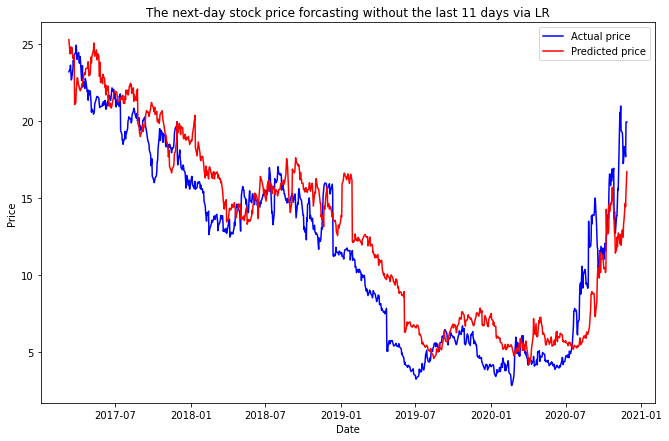

In [22]:
plt.figure(figsize = (11, 7))
plt.plot(dates_test[:-11], y_test[:-11], color= 'blue', label= 'Actual price')
plt.plot(dates_test[:-11], LR.predict(x_test[:-11]), color= 'red', label= 'Predicted price') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('The next-day stock price forcasting without the last 11 days via LR')
plt.legend()
plt.savefig('img/LR_30_without_last_11_days.png')
plt.show()

### Computing the root mean square error (RMSE)

In [34]:
print(f'The root mean square error (RMSE) for SVR model is {sqrt(mean_squared_error(y_test[:-11], SVR_RBF.predict(x_test[:-11])))}')

The root mean square error (RMSE) for SVR model is 2.8091336090024304


In [35]:
print(f'The root mean square error (RMSE) for LR model is {sqrt(mean_squared_error(y_test[:-11], LR.predict(x_test[:-11])))}')

The root mean square error (RMSE) for LR model is 2.3650731881289313


### Computing the coefficient of determination (R<sup>2</sup>)

In [36]:
print(f'The coefficient of determination (R^2) for the SVR model is {SVR_RBF.score(x_test[:-11], y_test[:-11])}')

The coefficient of determination (R^2) for the SVR model is 0.7861119325522514


In [37]:
print(f'The coefficient of determination (R^2) for the LR model is {LR.score(x_test[:-11], y_test[:-11])}')

The coefficient of determination (R^2) for the LR model is 0.8483889224721761


### Computing the accuracy of trend prediction

In [38]:
acc_SVR = accForTrendPredict(y_test.reshape(-1, 1), SVR_RBF.predict(x_test).reshape(-1, 1))
print(f'The accuracy of trend prediction for SVR model is {acc_SVR}%')

The accuracy of trend prediction for SVR model is 48.31223628691983%


In [39]:
acc_LR = accForTrendPredict(y_test.reshape(-1, 1), LR.predict(x_test).reshape(-1, 1))
print(f'The accuracy of trend prediction for LR model is {acc_LR}%')

The accuracy of trend prediction for LR model is 51.26582278481012%
